In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [6]:
df.shape

(31647, 18)

In [7]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [9]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [10]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [11]:
df.isnull()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31643,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31644,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31645,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no missing values in the train dataset.

In [13]:
categories = []
numerical = []
for i in df.columns:
    if(df[i].dtypes == 'object'):
        categories.append(i)
    else:
        numerical.append(i)

In [14]:
print("Categorical Values: \n", categories)
print("\nContinuous Values: \n", numerical)

Categorical Values: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']

Continuous Values: 
 ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


# Univariate Analysis

In [15]:
df['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [16]:
df['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [17]:
df['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [18]:
df['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

In [19]:
df['housing'].value_counts()

yes    17584
no     14063
Name: housing, dtype: int64

In [20]:
df['contact'].value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

In [21]:
df['month'].value_counts()

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

In [22]:
df['poutcome'].value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [23]:
def analysis(feature):
    sns.set_style('darkgrid')
    plt.figure(figsize=(8,6))
    sns.distplot(df[feature])
    plt.show()
    skew = df[feature].skew()
    kurt = df[feature].kurt()
    print("Skewness",skew)
    print("Kurtosis", kurt)

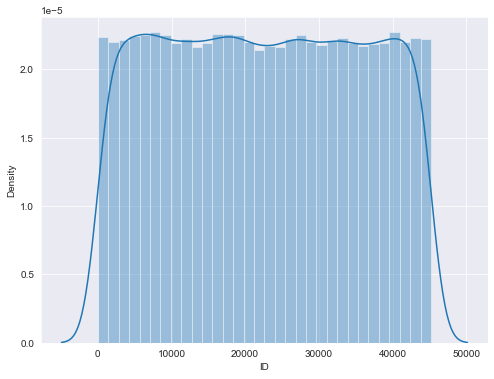

Skewness 0.00585079560701555
Kurtosis -1.2043412205822646


In [24]:
analysis('ID')

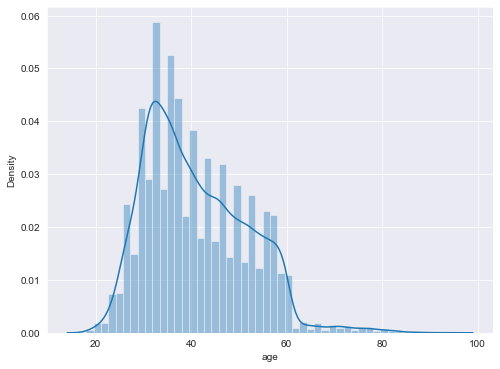

Skewness 0.6816067818884382
Kurtosis 0.2979752561545168


In [25]:
analysis('age')

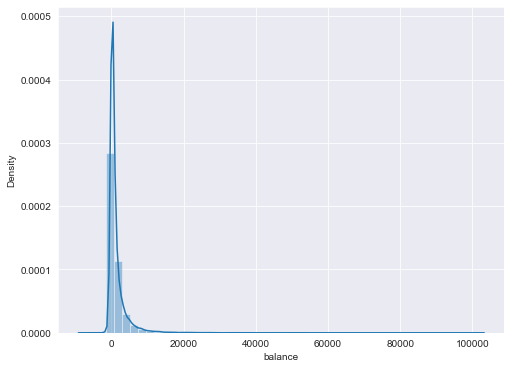

Skewness 7.995695573886313
Kurtosis 126.4512830433201


In [26]:
analysis('balance')

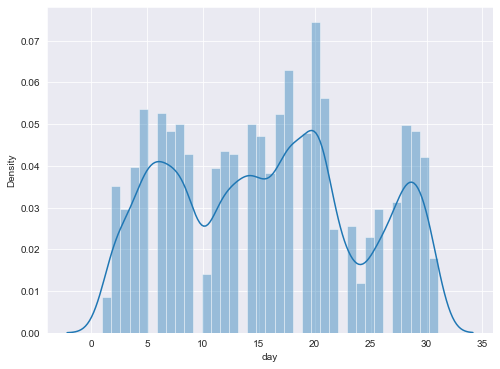

Skewness 0.08718543483770899
Kurtosis -1.0673970109865178


In [27]:
analysis('day')

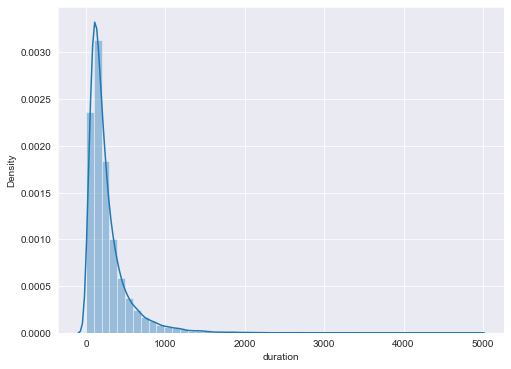

Skewness 3.1997657339236736
Kurtosis 19.48762713706081


In [28]:
analysis('duration')

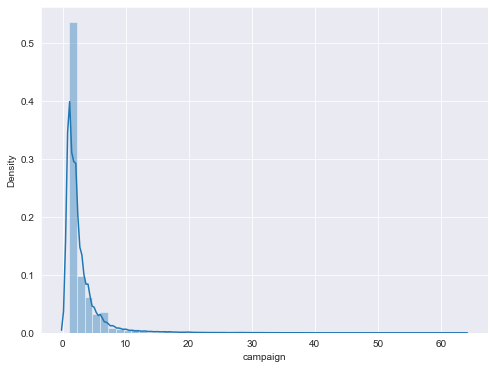

Skewness 4.873934933081073
Kurtosis 38.05799531921156


In [29]:
analysis('campaign')

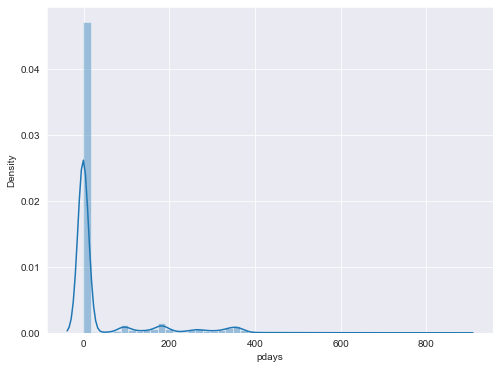

Skewness 2.642374162969253
Kurtosis 7.111294692528443


In [30]:
analysis('pdays')

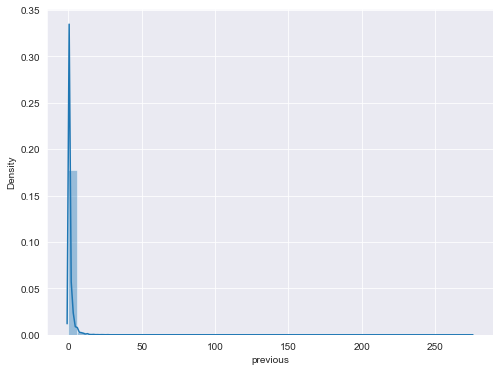

Skewness 49.30234792386907
Kurtosis 5236.411573858868


In [31]:
analysis('previous')

<AxesSubplot:xlabel='count', ylabel='job'>

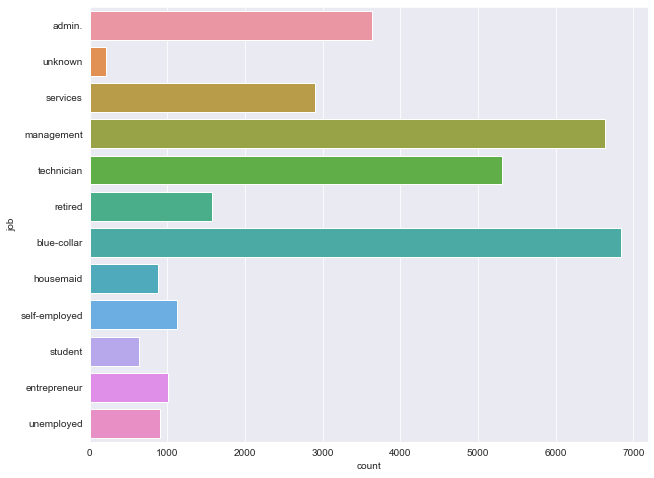

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(y='job', data=df)

<AxesSubplot:xlabel='marital', ylabel='count'>

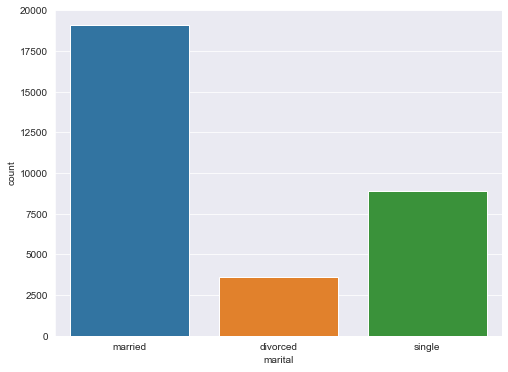

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(x= df['marital'])

<AxesSubplot:xlabel='education', ylabel='count'>

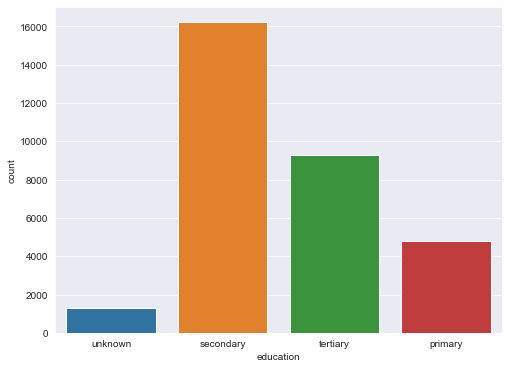

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['education'])

<AxesSubplot:xlabel='default', ylabel='count'>

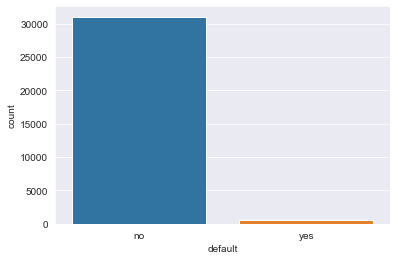

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['default'])

<AxesSubplot:xlabel='housing', ylabel='count'>

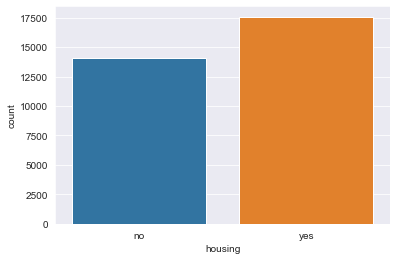

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['housing'])

<AxesSubplot:xlabel='contact', ylabel='count'>

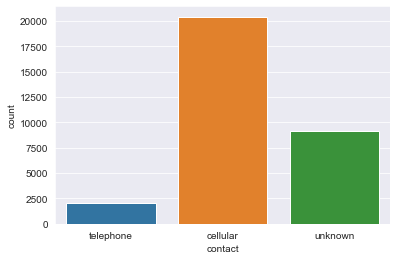

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['contact'])

<AxesSubplot:xlabel='count', ylabel='month'>

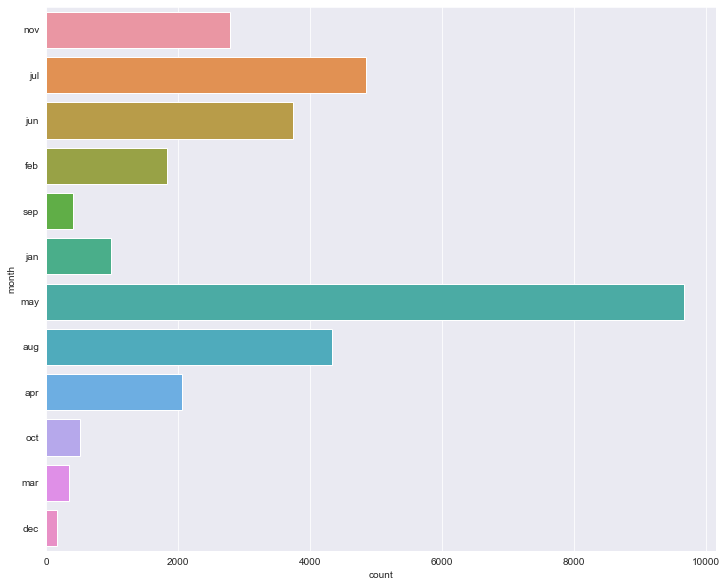

In [38]:
plt.figure(figsize=(12,10))
sns.countplot(y='month', data=df)

<AxesSubplot:xlabel='poutcome', ylabel='count'>

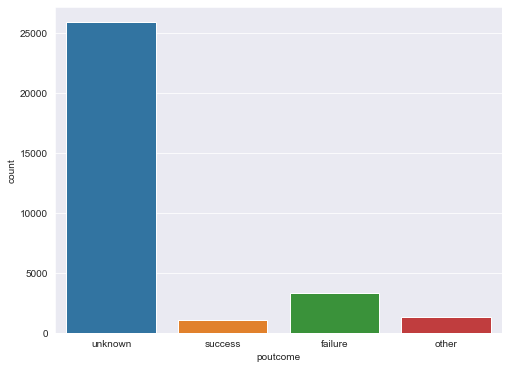

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['poutcome'])

# Bivariate Analysis

Continuous-Continuous Bivariate Analysis

<AxesSubplot:xlabel='age', ylabel='balance'>

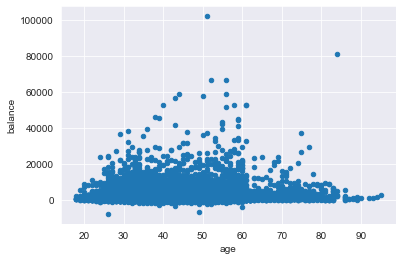

In [40]:
df.plot.scatter('age', 'balance')

In [41]:
df['subscribed'].replace('no', 0,inplace=True)
df['subscribed'].replace('yes', 1,inplace=True)

In [42]:
corr = df.corr()
corr

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


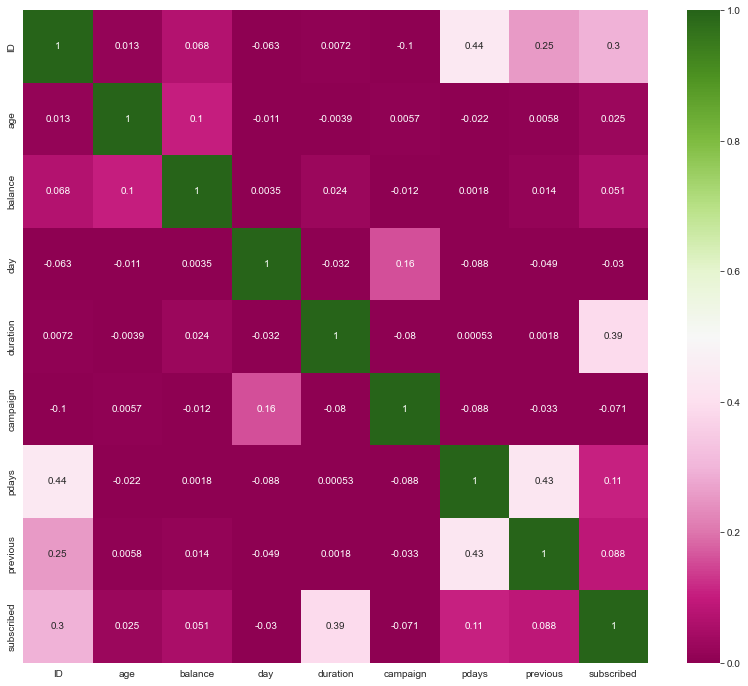

In [108]:
plt.figure(figsize = (14,12))
sns.heatmap(df.corr(), vmin=0, cmap='PiYG', annot=True)
plt.show()

 We can infer from the above heatmap that "duration" of the call is highly correlated with the "subscription" rate.

<Figure size 1440x1080 with 0 Axes>

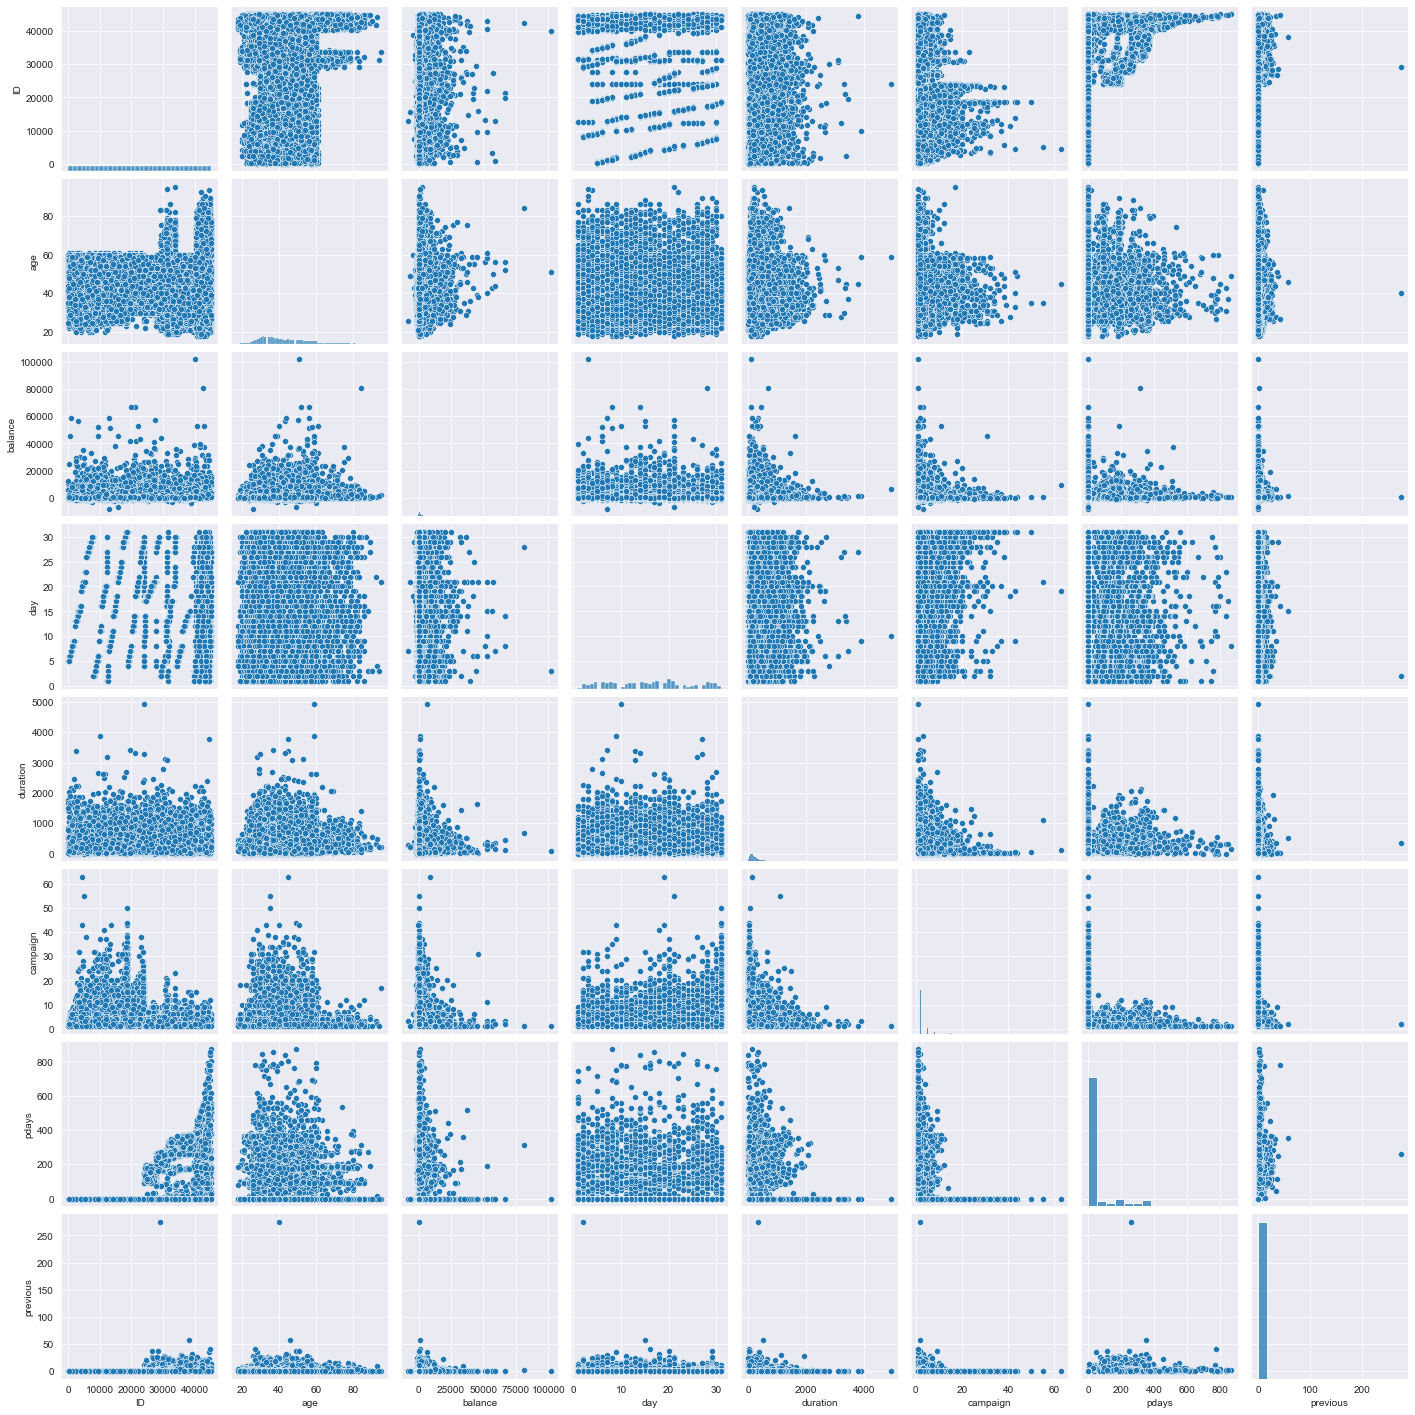

In [43]:
plt.figure(figsize=(20,15))
sns.pairplot(df[numerical])
plt.show()

Categorical-Categorical Bivariate Analysis

In [44]:
pd.crosstab(df['job'],df['subscribed'])

subscribed,0,1
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


In [45]:
pd.crosstab(df['default'],df['subscribed'])

subscribed,0,1
default,,
no,27388,3674
yes,544,41


# Handling Outlier

In [46]:
numerical

['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

<AxesSubplot:xlabel='age'>

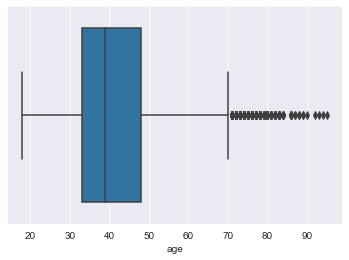

In [47]:
sns.boxplot(df['age'])

In [48]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1

q1, q3, iqr

(33.0, 48.0, 15.0)

In [49]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(10.5, 70.5)

In [50]:
new_df = df.copy()

In [51]:
#capping i.e we are eqauting the values of the outlier to upper and lower limit

new_df.loc[(new_df['age']>upper_limit), 'age'] = upper_limit
new_df.loc[(new_df['age']<lower_limit), 'age'] = lower_limit

<AxesSubplot:xlabel='age'>

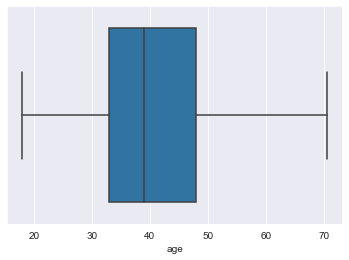

In [52]:
sns.boxplot(new_df['age'])

<AxesSubplot:xlabel='balance'>

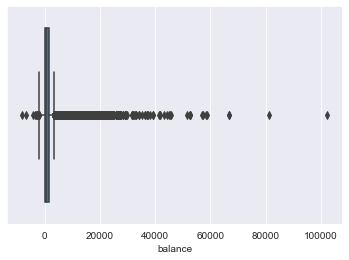

In [53]:
sns.boxplot(df['balance'])

In [54]:
q1 = df['balance'].quantile(0.25)
q3 = df['balance'].quantile(0.75)
iqr = q3 -q1

q1, q3, iqr

(73.0, 1431.0, 1358.0)

In [55]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

lower_limit, upper_limit

(-1964.0, 3468.0)

In [56]:
#Capping
new_df.loc[(new_df['balance']>upper_limit), 'balance'] = upper_limit
new_df.loc[(new_df['balance']<lower_limit), 'balance'] = lower_limit

<AxesSubplot:xlabel='balance'>

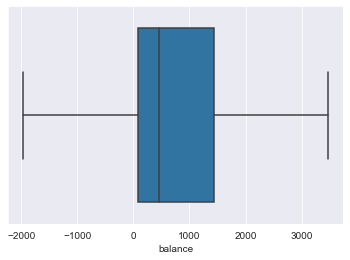

In [57]:
sns.boxplot(new_df['balance'])

<AxesSubplot:xlabel='day'>

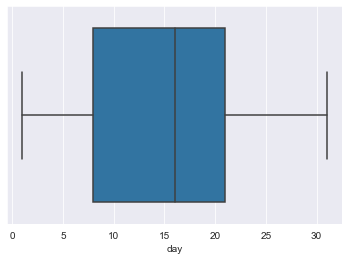

In [58]:
sns.boxplot(df['day'])

<AxesSubplot:xlabel='duration'>

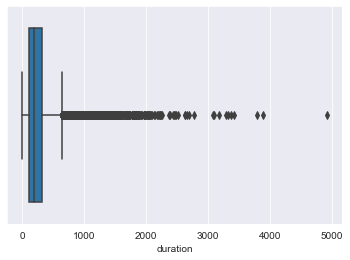

In [59]:
sns.boxplot(df['duration'])

In [60]:
q1 = df['duration'].quantile(0.25)
q3 = df['duration'].quantile(0.75)
iqr = q3-q1

q1, q3, iqr

(104.0, 318.5, 214.5)

In [61]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

lower_limit, upper_limit

(-217.75, 640.25)

In [62]:
#Capping
new_df.loc[(new_df['duration']>upper_limit), 'duration'] = upper_limit
new_df.loc[(new_df['duration']<lower_limit), 'duration'] = lower_limit

<AxesSubplot:xlabel='duration'>

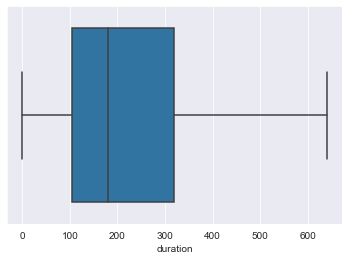

In [63]:
sns.boxplot(new_df['duration'])

<AxesSubplot:xlabel='campaign'>

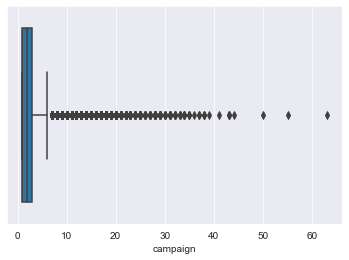

In [64]:
sns.boxplot(df['campaign'])

In [65]:
q1 = df['campaign'].quantile(0.25)
q3 = df['campaign'].quantile(0.75)
iqr = q3 - q1

q1, q3, iqr

(1.0, 3.0, 2.0)

In [66]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

lower_limit, upper_limit

(-2.0, 6.0)

In [67]:
#Capping
new_df.loc[(new_df['campaign']>upper_limit), 'campaign'] = upper_limit
new_df.loc[(new_df['campaign']<lower_limit), 'campaign'] = lower_limit

<AxesSubplot:xlabel='campaign'>

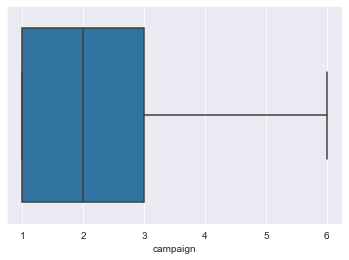

In [68]:
sns.boxplot(new_df['campaign'])

<AxesSubplot:xlabel='pdays'>

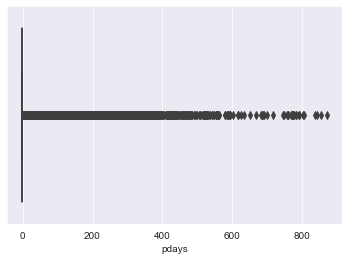

In [69]:
sns.boxplot(df['pdays'])

In [70]:
q1 = df['pdays'].quantile(0.25)
q3 = df['pdays'].quantile(0.75)
iqr = q3 - q1

q1, q3, iqr

(-1.0, -1.0, 0.0)

In [71]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

lower_limit, upper_limit

(-1.0, -1.0)

In [72]:
#Capping
new_df.loc[(new_df['pdays']>upper_limit), 'pdays'] = upper_limit
new_df.loc[(new_df['pdays']<lower_limit), 'pdays'] = lower_limit

<AxesSubplot:xlabel='pdays'>

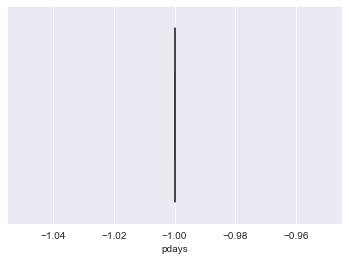

In [73]:
sns.boxplot(new_df['pdays'])

<AxesSubplot:xlabel='previous'>

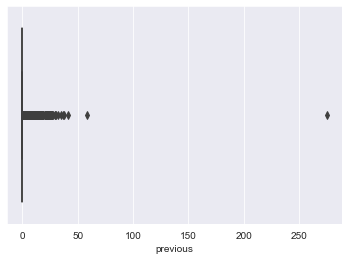

In [74]:
sns.boxplot(df['previous'])

In [75]:
q1 = df['previous'].quantile(0.25)
q3 = df['previous'].quantile(0.75)
iqr = q3 - q1

q1, q3, iqr

(0.0, 0.0, 0.0)

In [76]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 + (1.5 * iqr)

lower_limit, upper_limit

(0.0, 0.0)

In [77]:
#Capping
new_df.loc[(new_df['previous']>upper_limit), 'previous'] = upper_limit
new_df.loc[(new_df['previous']<lower_limit), 'previous'] = lower_limit

<AxesSubplot:xlabel='previous'>

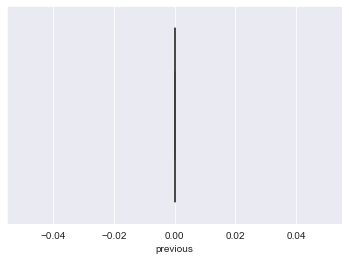

In [78]:
sns.boxplot(new_df['previous'])

# Feature Transformation

# Standardization for Numerical Feature

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler = MinMaxScaler()

In [81]:
categories = []
numerical = []
for i in new_df.columns:
    if(df[i].dtypes == 'object'):
        categories.append(i)
    else:
        numerical.append(i)

In [82]:
print("Numeric: ", numerical)

Numeric:  ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'subscribed']


In [83]:
num = df[numerical]
df_num = pd.DataFrame(scaler.fit_transform(num), columns = numerical)
df_num.head()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
0,0.577496,0.493506,0.090353,0.600000,0.008947,0.016129,0.000000,0.000000,0.0
1,0.897476,0.168831,0.072831,0.633333,0.018503,0.016129,0.000000,0.000000,0.0
2,0.338826,0.116883,0.080893,0.566667,0.048800,0.000000,0.000000,0.000000,0.0
3,0.972373,0.506494,0.102646,0.700000,0.176291,0.000000,0.097477,0.010909,1.0
4,0.660046,0.168831,0.073884,0.100000,0.077267,0.000000,0.000000,0.000000,0.0


# Model Building

In [84]:
target = new_df['subscribed']
train = new_df.drop('subscribed', axis=1)

In [85]:
train = pd.get_dummies(train)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train, x_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=20)

# Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
lreg = LogisticRegression()

In [90]:
lreg.fit(x_train, y_train)

LogisticRegression()

In [91]:
prediction = lreg.predict(x_val)

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
accuracy_score(y_val, prediction)

0.888783570300158

# Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [96]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [97]:
predict = clf.predict(x_val)

In [98]:
accuracy_score(y_val, predict)

0.9041074249605056

Now, we will make prediction on test dataset.

In [99]:
test = pd.read_csv('test.csv')

In [100]:
test = pd.get_dummies(test)

In [101]:
test_prediction = clf.predict(test)

Now, we will save the prediction on test dataset in a csv file.

In [102]:
prediction = pd.DataFrame()

In [103]:
prediction['ID'] = test['ID']
prediction['subscribed'] = test_prediction

In [104]:
prediction['subscribed'].replace(0, 'no', inplace=True)
prediction['subscribed'].replace(1, 'yes', inplace=True)

In [105]:
prediction.to_csv('prediction.csv', header=True, index=False)